# Introdução ao Pandas

O Pandas é uma ferramente de análise e manipulação de dados poderosa e fácil de usar.

https://pandas.pydata.org/

## Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import string
import random

## Estrutura de dados do Pandas

Série:

* Série é uma matriz rotulada unidimensional capaz de conter qualquer tipo de dados;
* Os rótulos dos eixos são chamados coletivamente de índice;
* O método básico para uma série é chamar:





`s = pd.Series(data, index = index)`



onde:
* data: pode ser um dicionário, ndarray, vetor escalar;
* index deve ser lista de rótulos de eixo.

## Criar uma série a partir de um array

In [ ]:
import string

data = [x for x in string.ascii_lowercase]  # criando uma lista de caracteres
index = list(range(0, len(data)))           # criando uma lista de números

s = pd.Series(data, index = index)          # criando um dataset
print(s)
s.index

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
dtype: object


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64')

In [ ]:
# quando não se informa o index o Pandar cria um range de indexadores
import string

data = [x for x in string.ascii_lowercase]
index = list(range(0, len(data)))

s = pd.Series(data)
print(s)
s.index

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
dtype: object


RangeIndex(start=0, stop=26, step=1)

In [ ]:
# criando um data com repetição dos valores do index

s = pd.Series(np.random.randint(10, size = 10), index = ['a', 'b', 'c', 'd', 'e', 'a', 'b', 'c', 'd', 'e'])
print(s, '\n')
print(s['a'], '\n')
s.index

a    1
b    4
c    8
d    4
e    8
a    1
b    1
c    8
d    0
e    0
dtype: int64 

a    1
a    1
dtype: int64 



Index(['a', 'b', 'c', 'd', 'e', 'a', 'b', 'c', 'd', 'e'], dtype='object')

## Criar uma série a partir de um dict

In [ ]:
data = [x for x in string.ascii_lowercase]
index = list(range(0, len(data)))

dict1 = {x : y for x, y in zip(index, data)}  # o resultado dessa linha será um dicionário
print(dict1, '\n')

s = pd.Series(dict1)    # transformando o dicionário em uma série no Pandas
print(s)

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'} 

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
dtype: object


In [ ]:
# criando uma série apenas com índices selecionados

s = pd.Series(dict1, index = [1, 3, 5, 7])  # index aqui funciona como um filtro
print(s)

1    b
3    d
5    f
7    h
dtype: object


* Se um índice for passado, os dados serão obtidos no dicionário usando os valores do índice como chave e a ordenação será adotada no índice. Se a chave não for encontrada do valor, será atribuido o valor NaN (not a number), marcador padrão de dados vazios usados no Pandas

In [ ]:
# gerando dois arrays
data = [x for x in string.ascii_lowercase]
index = list(range(0, len(data)))

# com os arrays, gerando um dicionário
dict1 = {x : y for x, y in zip(index, data)}
print(dict1, '\n')

novo_index = sorted(index, reverse = True)        # criando uma lista organizada de forma decrescente

novo_index = novo_index + list(range(26, 50, 1))  # o novo_index será acrescido de uma outra lista

s = pd.Series(dict1, index = novo_index)
print(s)

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'} 

25      z
24      y
23      x
22      w
21      v
20      u
19      t
18      s
17      r
16      q
15      p
14      o
13      n
12      m
11      l
10      k
9       j
8       i
7       h
6       g
5       f
4       e
3       d
2       c
1       b
0       a
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
dtype: object


## Criar um série a partir de um valor escalar

* Se data for um valor escalar, um índice deve ser fornecido. O valor será repetido para corresponder ao comprimento do índice;
* Cada coluna de um dataframe se comporta como uma série, ou seja, pode-se aplicar métodos de análise para cada uma dessas séries!

In [ ]:
# criando um dataframe com 10 elementos e com um único valor
data = [x for x in string.ascii_lowercase[0:10]]
valor = 10.5

s = pd.Series(valor, index = index)
print(s)

0     10.5
1     10.5
2     10.5
3     10.5
4     10.5
5     10.5
6     10.5
7     10.5
8     10.5
9     10.5
10    10.5
11    10.5
12    10.5
13    10.5
14    10.5
15    10.5
16    10.5
17    10.5
18    10.5
19    10.5
20    10.5
21    10.5
22    10.5
23    10.5
24    10.5
25    10.5
dtype: float64


In [ ]:
# somando os valores da série
np.sum(s)

273.0

In [ ]:
# usando os métodos da série
s.sum()

273.0

In [ ]:
# calculando a média
np.average(s)

10.5

In [ ]:
# criando uma série com valores string

index = list(range(0, 10))
valor = 'abc'
s = pd.Series(valor, index = index)
print(s)

0    abc
1    abc
2    abc
3    abc
4    abc
5    abc
6    abc
7    abc
8    abc
9    abc
dtype: object


## Acesso as informações de um dataset: semelhante a um acesso ao ndarray

In [ ]:
s = pd.Series(np.random.randint(70, 100, 10))
print(s)
s.index

0    72
1    71
2    88
3    98
4    86
5    89
6    81
7    91
8    86
9    85
dtype: int64


RangeIndex(start=0, stop=10, step=1)

In [ ]:
# formas de acesso:

print(s[0], '\n')
print(s[:3], '\n')

72 

0    72
1    71
2    88
dtype: int64 



In [ ]:
# Filtros booleanos - semelhante ao NumPy

s.median()

filtro = s > s.median()
print(filtro, '\n')
print(s[filtro], '\n')
print(s[s > s.median()], '\n')
print(s[[4, 3, 1]])

0    False
1    False
2     True
3     True
4    False
5     True
6    False
7     True
8    False
9    False
dtype: bool 

2    88
3    98
5    89
7    91
dtype: int64 

2    88
3    98
5    89
7    91
dtype: int64 

4    86
3    98
1    71
dtype: int64


## Operações sobre datasets é semelhante as operações de um ndarray

In [ ]:
s = pd.Series(np.random.randint(70, 100, 10))
print(s)
s.index

0    73
1    70
2    80
3    78
4    82
5    83
6    83
7    86
8    78
9    83
dtype: int64


RangeIndex(start=0, stop=10, step=1)

In [ ]:
print(np.sqrt(s))

0    8.544004
1    8.366600
2    8.944272
3    8.831761
4    9.055385
5    9.110434
6    9.110434
7    9.273618
8    8.831761
9    9.110434
dtype: float64


In [ ]:
print(np.exp(s))

0    5.052394e+31
1    2.515439e+30
2    5.540622e+34
3    7.498417e+33
4    4.093997e+35
5    1.112864e+36
6    1.112864e+36
7    2.235247e+37
8    7.498417e+33
9    1.112864e+36
dtype: float64


In [ ]:
print(np.power(s, 2))

0    5329
1    4900
2    6400
3    6084
4    6724
5    6889
6    6889
7    7396
8    6084
9    6889
dtype: int64


In [ ]:
print(s.dtype)

int64


In [ ]:
print(s.array)

<PandasArray>
[73, 70, 80, 78, 82, 83, 83, 86, 78, 83]
Length: 10, dtype: int64


## Criando uma série com `Series.to_numpy()`

In [ ]:
# a partir de uma série criada no Pandas, pode-se criar um array NumPy
# interessantes para aplicações que usam uma interface com aplicações NumPy

s.to_numpy()

array([73, 70, 80, 78, 82, 83, 83, 86, 78, 83])

## Criando uma série semelhante a um dicionário de tamanho fixo

In [ ]:
index = [x for x in string.ascii_lowercase[:10]]
data = list(range(0, len(index)))
s = pd.Series(data, index = index)
print(s)

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
j    9
dtype: int64


In [ ]:
# Acessando um valor específico
s['a']

0

In [ ]:
s['e']

4

In [ ]:
# atribuindo 12 na posição de índice 'e
s['e'] = 12
s

a     0
b     1
c     2
d     3
e    12
f     5
g     6
h     7
i     8
j     9
dtype: int64

In [ ]:
s.get('f')

5

In [ ]:
s.get('m', np.nan)

nan

## Operações vetorizadas com Séries
* Ao trabalhar com séries não pe necessário fazer um loop de valor por valor;
* A série também pode ser passada para a maioria dos métodos NumPy que esperam um ndarray

In [ ]:
data = list(range(0, 10))
s = pd.Series(data)
print(s)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64


In [ ]:
s + s

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
dtype: int64

In [ ]:
# multplica todos os valores de 's'
s * 3

0     0
1     3
2     6
3     9
4    12
5    15
6    18
7    21
8    24
9    27
dtype: int64

In [ ]:
np.sum(s)

45

* A principal diferença entre Series e ndarray é que as operações entre as séries alinham automaticamente os dados com base no rótulo
  * Se uma chave não for encontrada em ambas, o resultado será marcado como vazio (NaN)
  * Isso promove liberdade e flexibilidade na análise de dados interativos e é um dos diferenciais do Pandas

In [ ]:
# atribuindo valores aos respectivos index

vendas = pd.Series([100, 200, 300], index = ['Wil','Gabi','Alex'])
print(vendas)

Wil     100
Gabi    200
Alex    300
dtype: int64


In [ ]:
percentual_vendas = pd.Series([.05, .03, .02], index = ['Wil','Gabi','Alex'])
print(percentual_vendas)

Wil     0.05
Gabi    0.03
Alex    0.02
dtype: float64


In [ ]:
# calculando a comissão
vendas * percentual_vendas

Wil     5.0
Gabi    6.0
Alex    6.0
dtype: float64

In [ ]:
# o Pandas faz o alinhamento de dados para realizar a operação!
# neste caso, o percentual_vendas tem um index diferente das vendas

percentual_vendas = pd.Series([.02, .03, .05], index = ['Alex','Gabi','Wil'])
print(percentual_vendas)

Alex    0.02
Gabi    0.03
Wil     0.05
dtype: float64


In [ ]:
# calculando a comissão
vendas * percentual_vendas

Alex    6.0
Gabi    6.0
Wil     5.0
dtype: float64

In [ ]:
# operações com séries diferentes

index1 = [x for x in string.ascii_lowercase[:10]]
data1 = list(range(0, len(index1)))
s1 = pd.Series(data1, index = index1)

index2 = [x for x in string.ascii_lowercase[3:10]]
data2 = list(range(0, len(index2)))
s2 = pd.Series(data2, index = index2)

print(s1, '\n')
print(s2)

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
j    9
dtype: int64 

d    0
e    1
f    2
g    3
h    4
i    5
j    6
dtype: int64


In [ ]:
s1 + s2

a     NaN
b     NaN
c     NaN
d     3.0
e     5.0
f     7.0
g     9.0
h    11.0
i    13.0
j    15.0
dtype: float64

In [ ]:
s1 * s2

a     NaN
b     NaN
c     NaN
d     0.0
e     4.0
f    10.0
g    18.0
h    28.0
i    40.0
j    54.0
dtype: float64

## Atribuindo um nome para a série

In [ ]:
index1 = [x for x in string.ascii_lowercase[:10]]
data1 = list(range(0, len(index1)))
s1 = pd.Series(data1, index = index1, name = 'Série de Teste')
s1.name

'Série de Teste'

# DataFrame
* DataFrame é uma estrutura de dados rotulada bidimensional com colunas de tipos potencialmente diferentes;
* Objeto pandas é o mais comumente usado;
* Aceita muitos tipos diferentes de entrada na sua criação: Dict de 1D ndarrays, listas, dicts ou Series, 2-D numpy.ndarray, Outro DataFrame;
* Opcionalmente pode receber como argumentos de índice (rótulos de linha) e colunas (rótulos de coluna);
* Se não passar rótulos serão gerados automaticamente;

## Criando dataframe a partir de dict de Série ou dicts
* O índice resultante será a união dos índices das várias Séries.
* Se houver dicts aninhados, eles serão primeiro convertidos em Series.
* Se nenhuma coluna for passada, as colunas serão a lista ordenada de chaves de dicionário.

In [ ]:
# col1 e col2 são diferentes -> NaN como resposta!

d = {'col1': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'col2': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
print(d, '\n')

df = pd.DataFrame(d)
print (df.index, '\n')
print (df.columns, '\n')
df

{'col1': a    1.0
b    2.0
c    3.0
dtype: float64, 'col2': a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64} 

Index(['a', 'b', 'c', 'd'], dtype='object') 

Index(['col1', 'col2'], dtype='object') 



,col1,col2
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:
# criando um dataframe com indicações de index, respeitando a ordem e a quantidade

d = {'col1': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'col2': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
print(d, '\n')

df = pd.DataFrame(d, index=['d', 'b', 'a'])
print (df.index, '\n')
print (df.columns, '\n')
df

{'col1': a    1.0
b    2.0
c    3.0
dtype: float64, 'col2': a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64} 

Index(['d', 'b', 'a'], dtype='object') 

Index(['col1', 'col2'], dtype='object') 



,col1,col2
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [ ]:
# criando um dataframe com indicações de index, respeitando a ordem e a quantidade

d = {'col1': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'col2': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
print(d, '\n')

df = pd.DataFrame(d, index=['d', 'b'], columns=['col2'])
print (df.index, '\n')
print (df.columns, '\n')
df

{'col1': a    1.0
b    2.0
c    3.0
dtype: float64, 'col2': a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64} 

Index(['d', 'b'], dtype='object') 

Index(['col2'], dtype='object') 



,col2
d,4.0
b,2.0


In [ ]:
# criando um dataframe com indicações de index, respeitando a ordem e a quantidade
# quando o Pandas não encontra a informação, ele utiliza NaN

d = {'col1': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'col2': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

print(d, '\n')

df = pd.DataFrame(d, index=['d', 'b', 'a', 'm'], columns=['col1', 'col3'])
print (df.index, '\n')
print (df.columns, '\n')
df

{'col1': a    1.0
b    2.0
c    3.0
dtype: float64, 'col2': a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64} 

Index(['d', 'b', 'a', 'm'], dtype='object') 

Index(['col1', 'col3'], dtype='object') 



,col1,col3
d,NaN,NaN
b,2.0,NaN
a,1.0,NaN
m,NaN,NaN


In [ ]:
# Mais exemplos:

dados = {'perc_comissao' : pd.Series([.01, .015, .03], index=['João','Alexandre','Willian']),
          'vendas' : pd.Series([1000, 2000, 3000], index=['Willian','João','Alexandre']) }

In [ ]:
df_comissoes = pd.DataFrame(dados)
df_comissoes

,perc_comissao,vendas
Alexandre,0.015,3000
João,0.010,2000
Willian,0.030,1000


In [ ]:
# forma #1

df_comissoes['Comissao'] = df_comissoes['perc_comissao']  * df_comissoes['vendas']
df_comissoes

,perc_comissao,vendas,Comissao
Alexandre,0.015,3000,45.0
João,0.010,2000,20.0
Willian,0.030,1000,30.0


In [ ]:
# forma #2

df_comissoes['Comissao'] = df_comissoes.perc_comissao * df_comissoes.vendas
df_comissoes

,perc_comissao,vendas,Comissao
Alexandre,0.015,3000,45.0
João,0.010,2000,20.0
Willian,0.030,1000,30.0


## Criando dataframe a partir de dict de ndarrays / listas
* Os ndarrays / listas devem ter todos o mesmo comprimento.
* Se um índice for passado, ele deve ter o mesmo comprimento dos arrays.
* Se nenhum índice for passado, o resultado será range(n), onde né o comprimento do array.

In [ ]:
# index criado automaticamente

d = {'col1': [1., 2., 3., 4.],
'col2': [4., 3., 2., 1.]}

df = pd.DataFrame(d)

print (df.index, '\n' )
print (df.columns, '\n')
df 

RangeIndex(start=0, stop=4, step=1) 

Index(['col1', 'col2'], dtype='object') 



,col1,col2
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [ ]:
# informando o index
# as listas ou arrays precisam ser do mesmo tamanho!

d = {'col1': [1., 2., 3., 4.],
'col2': [4., 3., 2., 1.]}

df = pd.DataFrame(d, index=['a', 'b', 'c', 'd'])  # informando o index

print (df.index, '\n' )
print (df.columns, '\n')
df

Index(['a', 'b', 'c', 'd'], dtype='object') 

Index(['col1', 'col2'], dtype='object') 



,col1,col2
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [ ]:
df.head(2)

,col1,col2
a,1.0,4.0
b,2.0,3.0


## Criando dataframe a partir de matriz estruturada ou de registro
* Similar ao procedimento com dicionário de matrizes.
* O DataFrame tem similaridades, mas não foi projetado para funcionar exatamente como um ndarray NumPy bidimensional

In [ ]:
data = np.zeros((2, ), dtype=[('col1', 'i4'), ('col2', 'f4'), ('col3', 'U10')])
data[:] = [(1, 2., 'João'), (2, 3., "Sebastião")]
data

array([(1, 2., 'João'), (2, 3., 'Sebastião')],
      dtype=[('col1', '<i4'), ('col2', '<f4'), ('col3', '<U10')])

In [ ]:
# index criado automaticamente

df = pd.DataFrame(data)

print (df.index, '\n')
print (df.columns, '\n')
df

RangeIndex(start=0, stop=2, step=1) 

Index(['col1', 'col2', 'col3'], dtype='object') 



,col1,col2,col3
0,1,2.0,João
1,2,3.0,Sebastião


In [ ]:
# informando o index

df = pd.DataFrame(data, index=['a', 'b'])

print (df.index, '\n')
print (df.columns, '\n')
df

Index(['a', 'b'], dtype='object') 

Index(['col1', 'col2', 'col3'], dtype='object') 



,col1,col2,col3
a,1,2.0,João
b,2,3.0,Sebastião


In [ ]:
# criando a partir das colunas

df = pd.DataFrame(data, columns=['col1' , 'col2', 'col3'])

print (df.index, '\n')
print (df.columns, '\n')
df

RangeIndex(start=0, stop=2, step=1) 

Index(['col1', 'col2', 'col3'], dtype='object') 



,col1,col2,col3
0,1,2.0,João
1,2,3.0,Sebastião


## Criando dataframe a partir de uma lista de dicts

In [ ]:
data2 = [{'col1': 1, 'col2': 2}, 
         {'col1': 5, 'col2': 10, 'col3': 20}]

df = pd.DataFrame(data2)

print (df.index, '\n')
print (df.columns, '\n')
df

RangeIndex(start=0, stop=2, step=1) 

Index(['col1', 'col2', 'col3'], dtype='object') 



,col1,col2,col3
0,1,2,NaN
1,5,10,20.0


In [ ]:
data2 = [{'col1': 1, 'col2': 2}, 
         {'col1': 5, 'col2': 10, 'col3': 20}]
df = pd.DataFrame(data2, index=[3, 4])

print (df.index, '\n')
print (df.columns, '\n')
df 

Int64Index([3, 4], dtype='int64') 

Index(['col1', 'col2', 'col3'], dtype='object') 



,col1,col2,col3
3,1,2,NaN
4,5,10,20.0


Exemplo utilizando API de localidades

https://servicodados.ibge.gov.br/api/docs/localidades

https://servicodados.ibge.gov.br/api/v1/localidades/estados



In [ ]:
lista_estados = [{"id":11,"sigla":"RO","nome":"Rondônia","regiao":{"id":1,"sigla":"N","nome":"Norte"}},{"id":12,"sigla":"AC","nome":"Acre","regiao":{"id":1,"sigla":"N","nome":"Norte"}},{"id":13,"sigla":"AM","nome":"Amazonas","regiao":{"id":1,"sigla":"N","nome":"Norte"}},{"id":14,"sigla":"RR","nome":"Roraima","regiao":{"id":1,"sigla":"N","nome":"Norte"}},{"id":15,"sigla":"PA","nome":"Pará","regiao":{"id":1,"sigla":"N","nome":"Norte"}},{"id":16,"sigla":"AP","nome":"Amapá","regiao":{"id":1,"sigla":"N","nome":"Norte"}},{"id":17,"sigla":"TO","nome":"Tocantins","regiao":{"id":1,"sigla":"N","nome":"Norte"}},{"id":21,"sigla":"MA","nome":"Maranhão","regiao":{"id":2,"sigla":"NE","nome":"Nordeste"}},{"id":22,"sigla":"PI","nome":"Piauí","regiao":{"id":2,"sigla":"NE","nome":"Nordeste"}},{"id":23,"sigla":"CE","nome":"Ceará","regiao":{"id":2,"sigla":"NE","nome":"Nordeste"}},{"id":24,"sigla":"RN","nome":"Rio Grande do Norte","regiao":{"id":2,"sigla":"NE","nome":"Nordeste"}},{"id":25,"sigla":"PB","nome":"Paraíba","regiao":{"id":2,"sigla":"NE","nome":"Nordeste"}},{"id":26,"sigla":"PE","nome":"Pernambuco","regiao":{"id":2,"sigla":"NE","nome":"Nordeste"}},{"id":27,"sigla":"AL","nome":"Alagoas","regiao":{"id":2,"sigla":"NE","nome":"Nordeste"}},{"id":28,"sigla":"SE","nome":"Sergipe","regiao":{"id":2,"sigla":"NE","nome":"Nordeste"}},{"id":29,"sigla":"BA","nome":"Bahia","regiao":{"id":2,"sigla":"NE","nome":"Nordeste"}},{"id":31,"sigla":"MG","nome":"Minas Gerais","regiao":{"id":3,"sigla":"SE","nome":"Sudeste"}},{"id":32,"sigla":"ES","nome":"Espírito Santo","regiao":{"id":3,"sigla":"SE","nome":"Sudeste"}},{"id":33,"sigla":"RJ","nome":"Rio de Janeiro","regiao":{"id":3,"sigla":"SE","nome":"Sudeste"}},{"id":35,"sigla":"SP","nome":"São Paulo","regiao":{"id":3,"sigla":"SE","nome":"Sudeste"}},{"id":41,"sigla":"PR","nome":"Paraná","regiao":{"id":4,"sigla":"S","nome":"Sul"}},{"id":42,"sigla":"SC","nome":"Santa Catarina","regiao":{"id":4,"sigla":"S","nome":"Sul"}},{"id":43,"sigla":"RS","nome":"Rio Grande do Sul","regiao":{"id":4,"sigla":"S","nome":"Sul"}},{"id":50,"sigla":"MS","nome":"Mato Grosso do Sul","regiao":{"id":5,"sigla":"CO","nome":"Centro-Oeste"}},{"id":51,"sigla":"MT","nome":"Mato Grosso","regiao":{"id":5,"sigla":"CO","nome":"Centro-Oeste"}},{"id":52,"sigla":"GO","nome":"Goiás","regiao":{"id":5,"sigla":"CO","nome":"Centro-Oeste"}},{"id":53,"sigla":"DF","nome":"Distrito Federal","regiao":{"id":5,"sigla":"CO","nome":"Centro-Oeste"}}]

In [ ]:
# criando um dataframe com todas as informações obtidas do site

df_estados = pd.DataFrame(lista_estados)
df_estados.head(5)

,id,sigla,nome,regiao
0,11,RO,Rondônia,"{'id': 1, 'sigla': 'N', 'nome': 'Norte'}"
1,12,AC,Acre,"{'id': 1, 'sigla': 'N', 'nome': 'Norte'}"
2,13,AM,Amazonas,"{'id': 1, 'sigla': 'N', 'nome': 'Norte'}"
3,14,RR,Roraima,"{'id': 1, 'sigla': 'N', 'nome': 'Norte'}"
4,15,PA,Pará,"{'id': 1, 'sigla': 'N', 'nome': 'Norte'}"


In [ ]:
# criando com sigla e nome

df_estados = pd.DataFrame(lista_estados, columns=['sigla', 'nome'])
df_estados 

,sigla,nome
0,RO,Rondônia
1,AC,Acre
2,AM,Amazonas
3,RR,Roraima
4,PA,Pará
5,AP,Amapá
6,TO,Tocantins
7,MA,Maranhão
8,PI,Piauí
9,CE,Ceará


## Criando dataframe a partir de um dicionário de tuplas
* Pode-se criar automaticamente um dataframe Multindexado passando um dicionário de tuplas.

In [ ]:
df = pd.DataFrame({
        ('1BIM', 'JAN'): {
                    ('SE', 'São Paulo'): 45645, 
                    ('SE', 'Rio de Janeiro'): 4564, 
                    ('CO', 'Goiás'): 4564, 
                    ('CO', 'Mato Grosso'): 4564,        
                    },
        ('1BIM', 'FEV'): {
                    ('SE', 'São Paulo'): 45645, 
                    ('SE', 'Rio de Janeiro'): 4564, 
                    ('CO', 'Goiás'): 456456, 
                    ('CO', 'Mato Grosso'): 45645,       
                    },
        ('2BIM', 'MAR'): {
                    ('SE', 'São Paulo'): 4564, 
                    ('SE', 'Rio de Janeiro'): 456, 
                    ('CO', 'Goiás'): 45645, 
                    ('CO', 'Mato Grosso'): 3345,       
                    },
        ('2BIM', 'ABR'): {
                    ('SE', 'São Paulo'): 123132, 
                    ('SE', 'Rio de Janeiro'): 123123, 
                    ('CO', 'Goiás'): 12312, 
                    ('CO', 'Mato Grosso'): 1123,       
                    },
        })

print (df.index, '\n')
print (df.columns, '\n')
df 

MultiIndex([('SE',      'São Paulo'),
            ('SE', 'Rio de Janeiro'),
            ('CO',          'Goiás'),
            ('CO',    'Mato Grosso')],
           ) 

MultiIndex([('1BIM', 'JAN'),
            ('1BIM', 'FEV'),
            ('2BIM', 'MAR'),
            ('2BIM', 'ABR')],
           ) 



1BIM           2BIM        
                     JAN     FEV    MAR     ABR
SE São Paulo       45645   45645   4564  123132
   Rio de Janeiro   4564    4564    456  123123
CO Goiás            4564  456456  45645   12312
   Mato Grosso      4564   45645   3345    1123

In [ ]:
df['1BIM']

JAN     FEV
SE São Paulo       45645   45645
   Rio de Janeiro   4564    4564
CO Goiás            4564  456456
   Mato Grosso      4564   45645

In [ ]:
df['1BIM']['JAN']

SE  São Paulo         45645
    Rio de Janeiro     4564
CO  Goiás              4564
    Mato Grosso        4564
Name: JAN, dtype: int64

In [ ]:
df['1BIM']['JAN']['SE']

São Paulo         45645
Rio de Janeiro     4564
Name: JAN, dtype: int64

In [ ]:
df['1BIM']['JAN']['SE']['São Paulo']

45645

## Criando Dataframe a partir uma série
* O resultado será um DataFrame com o mesmo índice da série de entrada e com uma coluna cujo nome é o nome original da série (somente se nenhum outro nome de coluna for fornecido).

In [ ]:
# criando uma série

data = [x for x in string.ascii_lowercase]
index = list(range(0,len(data)))

dict1 =  { x : y for x, y in zip(index,data)}
print(dict1, '\n')

s = pd.Series(dict1)


s.name = 'coluna 01'
print(s)

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'} 

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
Name: coluna 01, dtype: object


In [ ]:
# transformando a série em um dataframe de uma coluna

df = pd.DataFrame(s)

print (df.index, '\n')
print (df.columns, '\n')
df 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64') 

Index(['coluna 01'], dtype='object') 



,coluna 01
0,a
1,b
2,c
3,d
4,e
5,f
6,g
7,h
8,i
9,j


## Criando a partir de dicionários usando `DataFrame.from_dict`
* DataFrame.from_dict utiliza um dict de dicts ou um dict de sequências do tipo array e retorna um DataFrame.

In [ ]:
df =  pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))
df

,A,B
0,1,4
1,2,5
2,3,6


### Criando uma nova coluna no df

In [ ]:
# Se você passar orient='index', as chaves serão os rótulos das linhas. Nesse caso, você também pode passar os nomes das colunas desejadas:

df = pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]),
                    orient='index', columns=['primeiro', 'segundo', 'terceiro'])
df

,primeiro,segundo,terceiro
A,1,2,3
B,4,5,6


In [ ]:
# criando uma nova coluna do df

df['quatro'] = df['primeiro'] * df['segundo']
df

,primeiro,segundo,terceiro,quatro
A,1,2,3,2
B,4,5,6,20


In [ ]:
# criando uma nova coluna do df

df['flag'] = df['primeiro'] > 2
df

,primeiro,segundo,terceiro,quatro,flag
A,1,2,3,2,False
B,4,5,6,20,True


### Excluindo colunas

In [ ]:
del df['segundo']
df

,primeiro,terceiro,quatro,flag
A,1,3,2,False
B,4,6,20,True


In [ ]:
col1 = df.pop('primeiro')
df

,terceiro,quatro,flag
A,3,2,False
B,6,20,True


### Preenchendo uma coluna com um valor

In [ ]:
df['quatro'] = 4
df

,terceiro,quatro,flag
A,3,4,False
B,6,4,True


In [ ]:
df['terceiro']['B']

6

In [ ]:
df['quinta'] = pd.Series([3,4], index = ['B','C'])
df

,terceiro,quatro,flag,quinta
A,3,4,False,NaN
B,6,4,True,3.0


### Inserir ndarrays brutos (seu comprimento deve corresponder ao comprimento do índice do DataFrame).

In [ ]:
df['arr'] = np.array([5,6])
df

,terceiro,quatro,flag,quinta,arr
A,3,4,False,NaN,5
B,6,4,True,3.0,6


In [ ]:
df.at['A', 'quatro'] = 8
df

,terceiro,quatro,flag,quinta,arr
A,3,8,False,NaN,5
B,6,4,True,3.0,6


### Lendo arquivos de arquivos *.csv
* Fazendo uma análise simples e algumas operações nos dataframes

In [ ]:
# usando dados de: https://covid.saude.gov.br/

df_covid_2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[2023 Minor]/[2023 - MIN708]/[2023.03.18] - Aula 05 - Pandas - Parte 01/_datasets/HIST_PAINEL_COVIDBR_2023_Parte1_11mar2023.csv', sep=';')
df_covid_2023.head(-5)


,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2023-01-01,1,210147125.0,36331281,0,693853,0,35006153.0,631275.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2023-01-02,1,210147125.0,36362366,31085,693981,128,35081933.0,586452.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2023-01-03,1,210147125.0,36390423,28057,694192,211,35147500.0,548731.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2023-01-04,1,210147125.0,36423138,32715,694411,219,35196324.0,532403.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2023-01-05,1,210147125.0,36450812,27674,694569,158,35225196.0,531047.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393320,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2023-03-02,9,3015268.0,897754,280,11844,0,NaN,NaN,1.0
393321,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2023-03-03,9,3015268.0,897897,143,11844,0,NaN,NaN,1.0
393322,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2023-03-04,9,3015268.0,898072,175,11845,1,NaN,NaN,1.0
393323,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2023-03-05,10,3015268.0,898072,0,11845,0,NaN,NaN,1.0


In [ ]:
df_covid_2023.head(-5)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2023-01-01,1,210147125.0,36331281,0,693853,0,35006153.0,631275.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2023-01-02,1,210147125.0,36362366,31085,693981,128,35081933.0,586452.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2023-01-03,1,210147125.0,36390423,28057,694192,211,35147500.0,548731.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2023-01-04,1,210147125.0,36423138,32715,694411,219,35196324.0,532403.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2023-01-05,1,210147125.0,36450812,27674,694569,158,35225196.0,531047.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393320,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2023-03-02,9,3015268.0,897754,280,11844,0,NaN,NaN,1.0
393321,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2023-03-03,9,3015268.0,897897,143,11844,0,NaN,NaN,1.0
393322,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2023-03-04,9,3015268.0,898072,175,11845,1,NaN,NaN,1.0
393323,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2023-03-05,10,3015268.0,898072,0,11845,0,NaN,NaN,1.0


In [ ]:
# filtro por estado, data, casos acumulados e obitos acumulados

df_covid_2023_estados = pd.DataFrame(df_covid_2023, columns = ['estado', 'municipio','data', 'casosAcumulado', 'obitosAcumulado'])
df_covid_2023_estados.head(5)

,estado,municipio,data,casosAcumulado,obitosAcumulado
0,NaN,NaN,2023-01-01,36331281,693853
1,NaN,NaN,2023-01-02,36362366,693981
2,NaN,NaN,2023-01-03,36390423,694192
3,NaN,NaN,2023-01-04,36423138,694411
4,NaN,NaN,2023-01-05,36450812,694569


In [ ]:
print(df_covid_2023_estados.shape)

(393330, 5)


In [ ]:
df_covid_2023_estados.head(-5)

,estado,municipio,data,casosAcumulado,obitosAcumulado
0,NaN,NaN,2023-01-01,36331281,693853
1,NaN,NaN,2023-01-02,36362366,693981
2,NaN,NaN,2023-01-03,36390423,694192
3,NaN,NaN,2023-01-04,36423138,694411
4,NaN,NaN,2023-01-05,36450812,694569
...,...,...,...,...,...
393320,DF,Brasília,2023-03-02,897754,11844
393321,DF,Brasília,2023-03-03,897897,11844
393322,DF,Brasília,2023-03-04,898072,11845
393323,DF,Brasília,2023-03-05,898072,11845


In [ ]:
# filtro por data: extraindo a última data disponível no DF

df_covid_2023_estados_data = df_covid_2023_estados.loc[df_covid_2023_estados['data'] == '2023-03-11']
df_covid_2023_estados_data.head()

,estado,municipio,data,casosAcumulado,obitosAcumulado
69,NaN,NaN,2023-03-11,37145514,699634
139,RO,NaN,2023-03-11,483211,7430
209,AC,NaN,2023-03-11,160530,2043
279,AM,NaN,2023-03-11,633733,14453
349,RR,NaN,2023-03-11,182625,2180


In [ ]:
df_covid_2023_estados_data.shape

(5619, 5)

In [ ]:
df_covid_2023_estados_data.head(-15)

,estado,municipio,data,casosAcumulado,obitosAcumulado
69,NaN,NaN,2023-03-11,37145514,699634
139,RO,NaN,2023-03-11,483211,7430
209,AC,NaN,2023-03-11,160530,2043
279,AM,NaN,2023-03-11,633733,14453
349,RR,NaN,2023-03-11,182625,2180
...,...,...,...,...,...
391999,GO,Sítio d'Abadia,2023-03-11,273,2
392069,GO,Taquaral de Goiás,2023-03-11,917,13
392139,GO,Teresina de Goiás,2023-03-11,409,1
392209,GO,Terezópolis de Goiás,2023-03-11,1738,29


In [ ]:
# excluindo as linhas do DF que contenham NaN na coluna 'estado'

df_covid_2023_estados_data = df_covid_2023_estados_data.dropna(subset=['estado'], how='any')
df_covid_2023_estados_data.head(10)

,estado,municipio,data,casosAcumulado,obitosAcumulado
139,RO,NaN,2023-03-11,483211,7430
209,AC,NaN,2023-03-11,160530,2043
279,AM,NaN,2023-03-11,633733,14453
349,RR,NaN,2023-03-11,182625,2180
419,PA,NaN,2023-03-11,873474,19031
489,AP,NaN,2023-03-11,185753,2169
559,TO,NaN,2023-03-11,366043,4235
629,MA,NaN,2023-03-11,493669,11055
699,PI,NaN,2023-03-11,426857,8358
769,CE,NaN,2023-03-11,1455149,28156


In [ ]:
df_covid_2023_estados_data.shape

(5618, 5)

In [ ]:
# excluindo as linhas do DF que contenham NaN na coluna 'municipio'

df_covid_2023_estados_data = df_covid_2023_estados_data.dropna(subset=['municipio'], how='any')
df_covid_2023_estados_data.head(10)

,estado,municipio,data,casosAcumulado,obitosAcumulado
2099,RO,Alta Floresta D'Oeste,2023-03-11,9178,84
2169,RO,Ariquemes,2023-03-11,36814,565
2239,RO,Cabixi,2023-03-11,1919,23
2309,RO,Cacoal,2023-03-11,31651,357
2379,RO,Cerejeiras,2023-03-11,6584,74
2449,RO,Colorado do Oeste,2023-03-11,4828,56
2519,RO,Corumbiara,2023-03-11,2336,25
2589,RO,Costa Marques,2023-03-11,4798,45
2659,RO,Espigão D'Oeste,2023-03-11,7971,92
2729,RO,Guajará-Mirim,2023-03-11,7121,245


In [ ]:
# verificando os estados do DF

valores_unicos = df_covid_2023_estados_data['estado'].sort_values().unique()
print(valores_unicos)

['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']


In [ ]:
# totalizando por estado

df_covid_2023_estados_data_acumulado = df_covid_2023_estados_data.groupby('estado')[['casosAcumulado', 'obitosAcumulado']].sum()
df_covid_2023_estados_data_acumulado.head(27)

,casosAcumulado,obitosAcumulado
estado,,
AC,160530,2043
AL,337774,7248
AM,633733,14453
AP,185753,2169
BA,1771615,31112
CE,1436983,28156
DF,898604,11847
ES,1314663,14759
GO,1903288,28045


In [ ]:
df_covid_2023_estados_data_acumulado.shape

(27, 2)

In [ ]:
soma_casosAcumulados = df_covid_2023_estados_data_acumulado['casosAcumulado'].sum()
print(soma_casosAcumulados)

37078450


In [ ]:
soma_obitosAcumulados = df_covid_2023_estados_data_acumulado['obitosAcumulado'].sum()
print(soma_obitosAcumulados)

698716


Comparando com o resultado da análise acima, a diferença no total de obitos ocorre devido a atualização do site vs. base de dados disponível

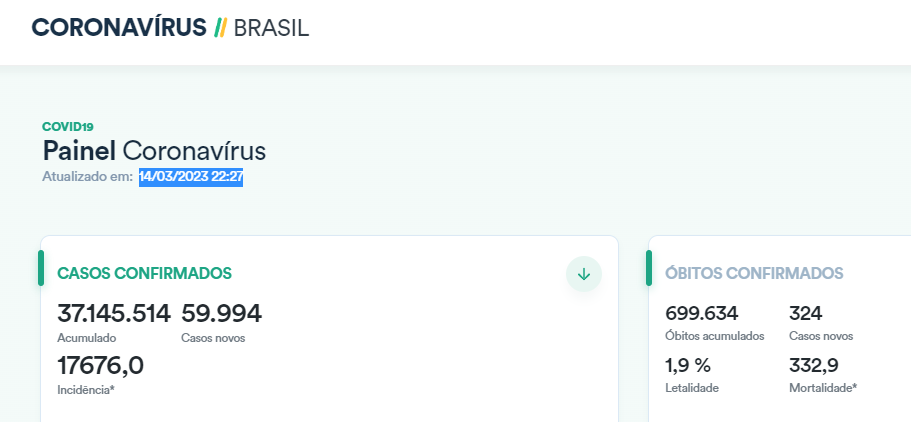

In [ ]:
 # Calculando taxa de letalidade:

 df_covid_2023_estados_data_acumulado['taxa_letalidade'] = (df_covid_2023_estados_data_acumulado['obitosAcumulado'] / df_covid_2023_estados_data_acumulado['casosAcumulado'])*100
 df_covid_2023_estados_data_acumulado.head(10)

,casosAcumulado,obitosAcumulado,taxa_letalidade
estado,,,
AC,160530,2043,1.272659
AL,337774,7248,2.145813
AM,633733,14453,2.280613
AP,185753,2169,1.167680
BA,1771615,31112,1.756138
CE,1436983,28156,1.959383
DF,898604,11847,1.318378
ES,1314663,14759,1.122645
GO,1903288,28045,1.473503


In [ ]:
 # por ordem descrescente
 
 df_covid_2023_estados_data_acumulado.sort_values('taxa_letalidade', ascending=False)

,casosAcumulado,obitosAcumulado,taxa_letalidade
estado,,,
RJ,2762341,76904,2.784015
SP,6489229,179176,2.761129
AM,633733,14453,2.280613
MA,493669,11055,2.239355
PA,873474,19031,2.178771
AL,337774,7248,2.145813
CE,1436983,28156,1.959383
PI,426857,8358,1.958033
PE,1159104,22691,1.957633


In [ ]:
# criando mais indicadores - usando assign:
# lamdca x: refere-se a cada linha do df

df_covid_2023_estados_data_acumulado =  df_covid_2023_estados_data_acumulado.assign(
    taxa_letalidade = lambda x: (x['obitosAcumulado'] / x['casosAcumulado']*100),
    casos_mil =  lambda x : x['obitosAcumulado']/1000,
    obtitos_mil = lambda x : x['casosAcumulado']/1000,
  )

df_covid_2023_estados_data_acumulado.head()

,casosAcumulado,obitosAcumulado,taxa_letalidade,casos_mil,obtitos_mil
estado,,,,,
AC,160530,2043,1.272659,2.043,160.530
AL,337774,7248,2.145813,7.248,337.774
AM,633733,14453,2.280613,14.453,633.733
AP,185753,2169,1.167680,2.169,185.753
BA,1771615,31112,1.756138,31.112,1771.615


## Indexação e Seleção de dados no DF

### Indexação / seleção
Os princípios básicos da indexação são os seguintes:

* Selecione a coluna: `df[col]`
* Selecione linha por etiqueta: `df.loc[label]`
* Selecione linha por localização de inteiro: `df.iloc[loc]`
* Fatia de linhas: `df[5:10]`
* Selecione as linhas por vetor booleano: `df[bool_vec]`

In [ ]:
## Indexação e Seleção de dados no DF

In [ ]:
df_covid_2023_estados_data_acumulado.head()

,casosAcumulado,obitosAcumulado,taxa_letalidade,casos_mil,obtitos_mil
estado,,,,,
AC,160530,2043,1.272659,2.043,160.530
AL,337774,7248,2.145813,7.248,337.774
AM,633733,14453,2.280613,14.453,633.733
AP,185753,2169,1.167680,2.169,185.753
BA,1771615,31112,1.756138,31.112,1771.615


In [ ]:
df_covid_2023_estados_data_acumulado.shape

(27, 5)

### Atribuindo o número de linhas em um DF

In [ ]:
# utilize: reset_index

df_covid_2023_estados_data_acumulado = df_covid_2023_estados_data_acumulado.reset_index(drop=False)
df_covid_2023_estados_data_acumulado.head()

,estado,casosAcumulado,obitosAcumulado,taxa_letalidade,casos_mil,obtitos_mil
0,AC,160530,2043,1.272659,2.043,160.530
1,AL,337774,7248,2.145813,7.248,337.774
2,AM,633733,14453,2.280613,14.453,633.733
3,AP,185753,2169,1.167680,2.169,185.753
4,BA,1771615,31112,1.756138,31.112,1771.615


### Seleção de linha

Os métodos `loc` e `iloc` são usados para acessar e manipular dados em um dataframe do pandas, mas possuem diferentes formas de indexação:

`loc`: é usado para selecionar dados de um dataframe com base em um rótulo (label), que pode ser o nome de uma coluna ou o índice de uma linha. Ele aceita como entrada um ou mais rótulos e retorna um dataframe contendo todas as linhas que correspondem aos rótulos especificados. Exemplo: `df.loc[:, 'coluna']` retorna todas as linhas da coluna "coluna" do dataframe df.

`iloc`: é usado para selecionar dados de um dataframe com base em sua posição numérica. Ele aceita como entrada um ou mais índices numéricos e retorna um dataframe contendo todas as linhas que correspondem às posições especificadas. Exemplo: `df.iloc[:, 0]` retorna todas as linhas da primeira coluna do dataframe df.

Portanto, a diferença entre `loc` e `iloc` é que o primeiro se baseia em rótulos e o segundo em índices numéricos. O método loc é mais útil quando você precisa selecionar dados com base em rótulos explícitos, enquanto o iloc é mais útil quando você precisa selecionar dados com base em sua posição numérica.

In [ ]:
df_covid_2023_estados_data_acumulado.loc[1]

estado                   AL
casosAcumulado       337774
obitosAcumulado        7248
taxa_letalidade    2.145813
casos_mil             7.248
obtitos_mil         337.774
Name: 1, dtype: object

In [ ]:
df_covid_2023_estados_data_acumulado.iloc[1]

estado                   AL
casosAcumulado       337774
obitosAcumulado        7248
taxa_letalidade    2.145813
casos_mil             7.248
obtitos_mil         337.774
Name: 1, dtype: object

In [ ]:
# selecionando um trecho do DF

df_covid_2023_estados_data_acumulado[5:9]

,estado,casosAcumulado,obitosAcumulado,taxa_letalidade,casos_mil,obtitos_mil
5,CE,1436983,28156,1.959383,28.156,1436.983
6,DF,898604,11847,1.318378,11.847,898.604
7,ES,1314663,14759,1.122645,14.759,1314.663
8,GO,1903288,28045,1.473503,28.045,1903.288


In [ ]:
# fazendo um filtro booleado

filtro  = df_covid_2023_estados_data_acumulado['taxa_letalidade'] > 2
filtro  # array booleado
df_covid_2023_estados_data_acumulado[filtro] 

,estado,casosAcumulado,obitosAcumulado,taxa_letalidade,casos_mil,obtitos_mil
1,AL,337774,7248,2.145813,7.248,337.774
2,AM,633733,14453,2.280613,14.453,633.733
9,MA,493669,11055,2.239355,11.055,493.669
13,PA,873474,19031,2.178771,19.031,873.474
18,RJ,2762341,76904,2.784015,76.904,2762.341
25,SP,6489229,179176,2.761129,179.176,6489.229


In [ ]:
df_covid_2023_estados_data_acumulado.columns

Index(['estado', 'casosAcumulado', 'obitosAcumulado', 'taxa_letalidade',
       'casos_mil', 'obtitos_mil'],
      dtype='object')

In [ ]:
# filtros por colunas

df_covid_2023_estados_data_acumulado_2 =  df_covid_2023_estados_data_acumulado[['estado', 'casos_mil', 'obtitos_mil']]
df_covid_2023_estados_data_acumulado_2

,estado,casos_mil,obtitos_mil
0,AC,2.043,160.530
1,AL,7.248,337.774
2,AM,14.453,633.733
3,AP,2.169,185.753
4,BA,31.112,1771.615
5,CE,28.156,1436.983
6,DF,11.847,898.604
7,ES,14.759,1314.663
8,GO,28.045,1903.288
9,MA,11.055,493.669


In [ ]:
# organizando por colunas

df_covid_2023_estados_data_acumulado_2 = df_covid_2023_estados_data_acumulado_2.sort_values(by='obtitos_mil', ascending=False)
df_covid_2023_estados_data_acumulado_2.reset_index(inplace=True, drop=True)

df_covid_2023_estados_data_acumulado_2

,estado,casos_mil,obtitos_mil
0,SP,179.176,6489.229
1,MG,65.555,4194.616
2,RS,41.935,2966.100
3,PR,45.784,2909.459
4,RJ,76.904,2762.341
5,SC,22.704,1991.039
6,GO,28.045,1903.288
7,BA,31.112,1771.615
8,CE,28.156,1436.983
9,ES,14.759,1314.663
